# Feature Engineering and Modelling

---

1. Import packages
2. Load data
3. Modelling

---

## 1. Import packages

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---
## 2. Load data

In [3]:
train_df = pd.read_csv('train_dataset_10x.csv')
train_df.drop(columns=["Unnamed: 0"], inplace=True)
train_df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,4d456153f156b6225f7da69e8d103c58,3.934296,0.000000,2.946452,3.021049,0.0,1.280578,0.167086,0.088444,45.308378,...,27.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,48e15aa3c54808b878949a0eef97997c,4.539791,0.000000,3.175222,2.571453,0.0,1.224792,0.146694,0.000000,44.311378,...,45.0,9.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,aa77e9897796ad0d22a357d64b13a3d2,4.549959,3.759592,3.450095,3.539975,0.0,2.117139,0.115761,0.099419,40.606701,...,8.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1e5637d4dd7b69d5fd27ae7a7d20511d,3.770410,0.000000,0.000000,2.885599,0.0,1.229938,0.168242,0.089602,45.308378,...,38.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1f7a4258807f05b61ef788e169ed9fba,3.785259,0.000000,0.000000,2.961848,0.0,1.779885,0.145711,0.000000,44.311378,...,53.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [4]:
test_df = pd.read_csv('test_dataset_10x.csv')
test_df.drop(columns=["Unnamed: 0"], inplace=True)
test_df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,95c47f200fcad5167bbbfd71a33ec174,4.173390,4.193598,3.165541,3.168368,0.0,2.073828,0.114667,0.099548,40.606701,...,2,1,0,0,1,0,0,0,0,1
1,b2b1e0837db7f608b5bbb1bacc0cf49d,4.075036,0.000000,3.003461,3.305998,30.0,1.255031,0.198096,0.000000,46.305378,...,3,3,0,0,1,0,0,0,0,1
2,7ae5831aa008e89c66c15bec5db55f37,3.848435,0.000000,0.000000,2.756568,0.0,1.289366,0.141434,0.000000,44.311378,...,5,3,0,0,1,0,0,0,0,1
3,07ba25a19f5ed4cab9af7d8a42639374,4.345433,0.000000,0.000000,3.516690,0.0,1.304921,0.142996,0.000000,44.311378,...,0,10,0,0,1,0,0,0,0,1
4,843b625cba0d4a1e8862a26f80c12681,4.185655,0.000000,3.355834,3.208148,0.0,2.123067,0.120372,0.103487,40.606701,...,45,9,0,0,1,0,0,0,1,0


---

## 3. Modelling

We now have a dataset containing features that we have engineered and we are ready to start training a predictive model. Remember, we only need to focus on training a `Random Forest` classifier.

In [5]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection

### Data sampling

The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.

A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

In [18]:
# Make a copy of our data
train_df = train_df.copy()
test_df = test_df.copy()

# Separate target variable from independent variables
y_train = train_df['churn']
y_test = test_df['churn']

X_train = train_df.drop(columns=['id', 'churn'])
X_test = test_df.drop(columns=['id', 'churn'])

rp = GaussianRandomProjection(n_components=15, random_state=42)
X_train_reduced = rp.fit_transform(X_train)
X_test_reduced = rp.transform(X_test)

ValueError: Input X contains NaN.
GaussianRandomProjection does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train_reduced.shape)
print(y_train.shape)
print(X_test_reduced.shape)
print(y_test.shape)

### Model training

Once again, we are using a `Random Forest` classifier in this example. A Random Forest sits within the category of `ensemble` algorithms because internally the `Forest` refers to a collection of `Decision Trees` which are tree-based learning algorithms. As the data scientist, you can control how large the forest is (that is, how many decision trees you want to include).

The reason why an `ensemble` algorithm is powerful is because of the laws of averaging, weak learners and the central limit theorem. If we take a single decision tree and give it a sample of data and some parameters, it will learn patterns from the data. It may be overfit or it may be underfit, but that is now our only hope, that single algorithm.

With `ensemble` methods, instead of banking on 1 single trained model, we can train 1000's of decision trees, all using different splits of the data and learning different patterns. It would be like asking 1000 people to all learn how to code. You would end up with 1000 people with different answers, methods and styles! The weak learner notion applies here too, it has been found that if you train your learners not to overfit, but to learn weak patterns within the data and you have a lot of these weak learners, together they come together to form a highly predictive pool of knowledge! This is a real life application of many brains are better than 1.

Now instead of relying on 1 single decision tree for prediction, the random forest puts it to the overall views of the entire collection of decision trees. Some ensemble algorithms using a voting approach to decide which prediction is best, others using averaging.

As we increase the number of learners, the idea is that the random forest's performance should converge to its best possible solution.

Some additional advantages of the random forest classifier include:

- The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled
- It is able to handle non-linear parameters better than linear based models

On the flip side, some disadvantages of the random forest classifier include:

- The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.
- Training time can be longer due to the increased complexity and size of thee ensemble

In [8]:
import time
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.random_projection import SparseRandomProjection
from sklearn.impute import SimpleImputer

# Handle missing values in X_train
imputer = SimpleImputer(strategy='mean')  # Replace NaN with the mean of each feature
X_train_imputed = imputer.fit_transform(X_train)

# Set the reduced dimensionality d according to Sparse JL Lemma
n_samples, n_features = X_train_imputed.shape
epsilon = 0.1  # Tolerance level
d = int(min(np.log(n_samples) / (epsilon ** 2), n_features))  # Reduced dimension cannot exceed n_features

# Apply Sparse Johnson-Lindenstrauss Lemma (SparseRandomProjection)
sparse_jl_transformer = SparseRandomProjection(n_components=d, random_state=42)
X_train_sparse_jl = sparse_jl_transformer.fit_transform(X_train_imputed)  # Dimensionality reduction

# Train the Random Forest classifier
model = RandomForestClassifier(
    n_estimators=1000,
    random_state=42
)

start_time = time.time()
model.fit(X_train_sparse_jl, y_train)
end_time = time.time()

training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

# Handle missing values in X_test and apply the same transformation
X_test_imputed = imputer.transform(X_test)
X_test_sparse_jl = sparse_jl_transformer.transform(X_test_imputed)


Training time: 618.94 seconds


The Scikit-learn documentation provides detailed information about the algorithm and the parameters you can use when training a Random Forest Classifier. You can access the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

For this example, we are using n_estimators=1000. This means the random forest will consist of 1000 decision trees. Increasing the number of trees can improve the model's performance but also increases the computational time.

There are many more hyperparameters you can fine-tune in the random forest, such as:

max_depth: The maximum depth of each tree.
min_samples_split: The minimum number of samples required to split a node.
min_samples_leaf: The minimum number of samples required to be at a leaf node.
max_features: The number of features to consider when looking for the best split.
Fine-tuning these parameters can significantly improve the model's performance. However, finding the optimal combination of parameters is often a task that involves exploration, trial and error, or grid/randomized search.

In this notebook, we focus on demonstrating the Sparse Johnson-Lindenstrauss Lemma for dimensionality reduction followed by training a Random Forest classifier. For simplicity, we set n_estimators=1000 and keep other parameters as default. These parameters can be further optimized using tools like GridSearchCV or RandomizedSearchCV.

### Evaluation

Now let's evaluate how well this trained model is able to predict the values of the test dataset.

We are going to use 3 metrics to evaluate performance:

- Accuracy = the ratio of correctly predicted observations to the total observations
- Precision = the ability of the classifier to not label a negative sample as positive
- Recall = the ability of the classifier to find all the positive samples

The reason why we are using these three metrics is because a simple accuracy is not always a good measure to use. To give an example, let's say you're predicting heart failures with patients in a hospital and there were 100 patients out of 1000 that did have a heart failure.

If you predicted 80 out of 100 (80%) of the patients that did have a heart failure correctly, you might think that you've done well! However, this also means that you predicted 20 wrong and what may the implications of predicting these remaining 20 patients wrong? Maybe they miss out on getting vital treatment to save their lives.

As well as this, what about the impact of predicting negative cases as positive (people not having heart failure being predicted that they did), maybe a high number of false positives means that resources get used up on thee wrong people and a lot of time is wasted when they could have been helping the real heart failure sufferers.

This is just an example, but it illustrates why other performance metrics are necessary such `Precision` and `Recall`, which are good measures to use in a classification scenario.

In [10]:
predictions = model.predict(X_test_sparse_jl)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()

In [11]:
y_test.value_counts()

,count
churn,
0,32860
1,3660


In [12]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"Precision: {metrics.precision_score(y_test, predictions)}")
print(f"Recall: {metrics.recall_score(y_test, predictions)}")

True positives: 310
False positives: 140
True negatives: 32720
False negatives: 3350

Accuracy: 0.9044359255202629
Precision: 0.6888888888888889
Recall: 0.08469945355191257


Results Analysis
Note: If you run this code again, results may vary slightly due to the randomness in the model training process.

Dataset Distribution:
In the test set:

Around 10% of the rows are churners (churn = 1).
90% are non-churners (churn = 0).
This class imbalance should be considered when interpreting results.
True Negatives (TN):
Out of 32,860 non-churners, the model correctly identified 32,720 as non-churners. This is excellent!

False Positives (FP):
140 cases were predicted as churners (churn = 1) when they were actually non-churners. This is relatively low, which is good.

True Positives (TP):
Out of 3,660 churners, the model correctly identified only 310 as churners, which is poor and suggests that the model struggles to identify positive cases.

False Negatives (FN):
The model failed to identify 3,350 churners and classified them as non-churners (churn = 0). This high number of false negatives is concerning because it implies the model is missing many actual churners.

Metrics Analysis
Accuracy:
The accuracy score is 0.904 (90.44%), which seems very high. However, due to the imbalance in the dataset, accuracy is not a reliable metric here.

Precision:
The precision score is 0.689, indicating that when the model predicts churn, it's correct about 68.9% of the time. While this is decent, it’s not enough to compensate for the low recall.

Recall:
The recall score is 0.085, meaning that the model correctly identifies only 8.5% of churners. This is very poor and highlights that the model is failing to capture most positive cases (churners).



Here’s the updated explanation based on the given outputs:

Results Analysis
Note: If you run this code again, results may vary slightly due to the randomness in the model training process.

Dataset Distribution:
In the test set:

Around 10% of the rows are churners (churn = 1).
90% are non-churners (churn = 0).
This class imbalance should be considered when interpreting results.
True Negatives (TN):
Out of 32,860 non-churners, the model correctly identified 32,720 as non-churners. This is excellent!

False Positives (FP):
140 cases were predicted as churners (churn = 1) when they were actually non-churners. This is relatively low, which is good.

True Positives (TP):
Out of 3,660 churners, the model correctly identified only 310 as churners, which is poor and suggests that the model struggles to identify positive cases.

False Negatives (FN):
The model failed to identify 3,350 churners and classified them as non-churners (churn = 0). This high number of false negatives is concerning because it implies the model is missing many actual churners.

Metrics Analysis
Accuracy:
The accuracy score is 0.904 (90.44%), which seems very high. However, due to the imbalance in the dataset, accuracy is not a reliable metric here.

Precision:
The precision score is 0.689, indicating that when the model predicts churn, it's correct about 68.9% of the time. While this is decent, it’s not enough to compensate for the low recall.

Recall:
The recall score is 0.085, meaning that the model correctly identifies only 8.5% of churners. This is very poor and highlights that the model is failing to capture most positive cases (churners).

Conclusion and Next Steps
Current Performance:
The model is very good at identifying non-churners but performs poorly in identifying churners. Most of the actual churners are being missed, as reflected by the low recall score.

Feature Engineering:
The existing features are likely not discriminative enough to distinguish between churners and non-churners. The next step would be to revisit the feature set and engineer more predictive features.

Balancing the Dataset:
The dataset is heavily imbalanced (10% churners). Techniques such as oversampling churners, undersampling non-churners, or using class-weight adjustments in the Random Forest model can help.

Model Optimization:

Experiment with hyperparameter tuning, such as increasing the number of trees (n_estimators) or adjusting the maximum tree depth (max_depth).
Consider using ensemble techniques or models like Gradient Boosting, which may handle imbalance better.
Focus on Recall:
To address the high false negatives, prioritize improving recall, even if it means a slight drop in precision or accuracy. High recall is crucial in scenarios like churn prediction, where missing a churner can be costly.

Understanding the Model
One way to analyze the model is by looking at feature importances. In a Random Forest classifier, feature importance indicates how often a feature is used for splitting across all the trees. This can help identify which features are most impactful in the model's predictions.


In [13]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()


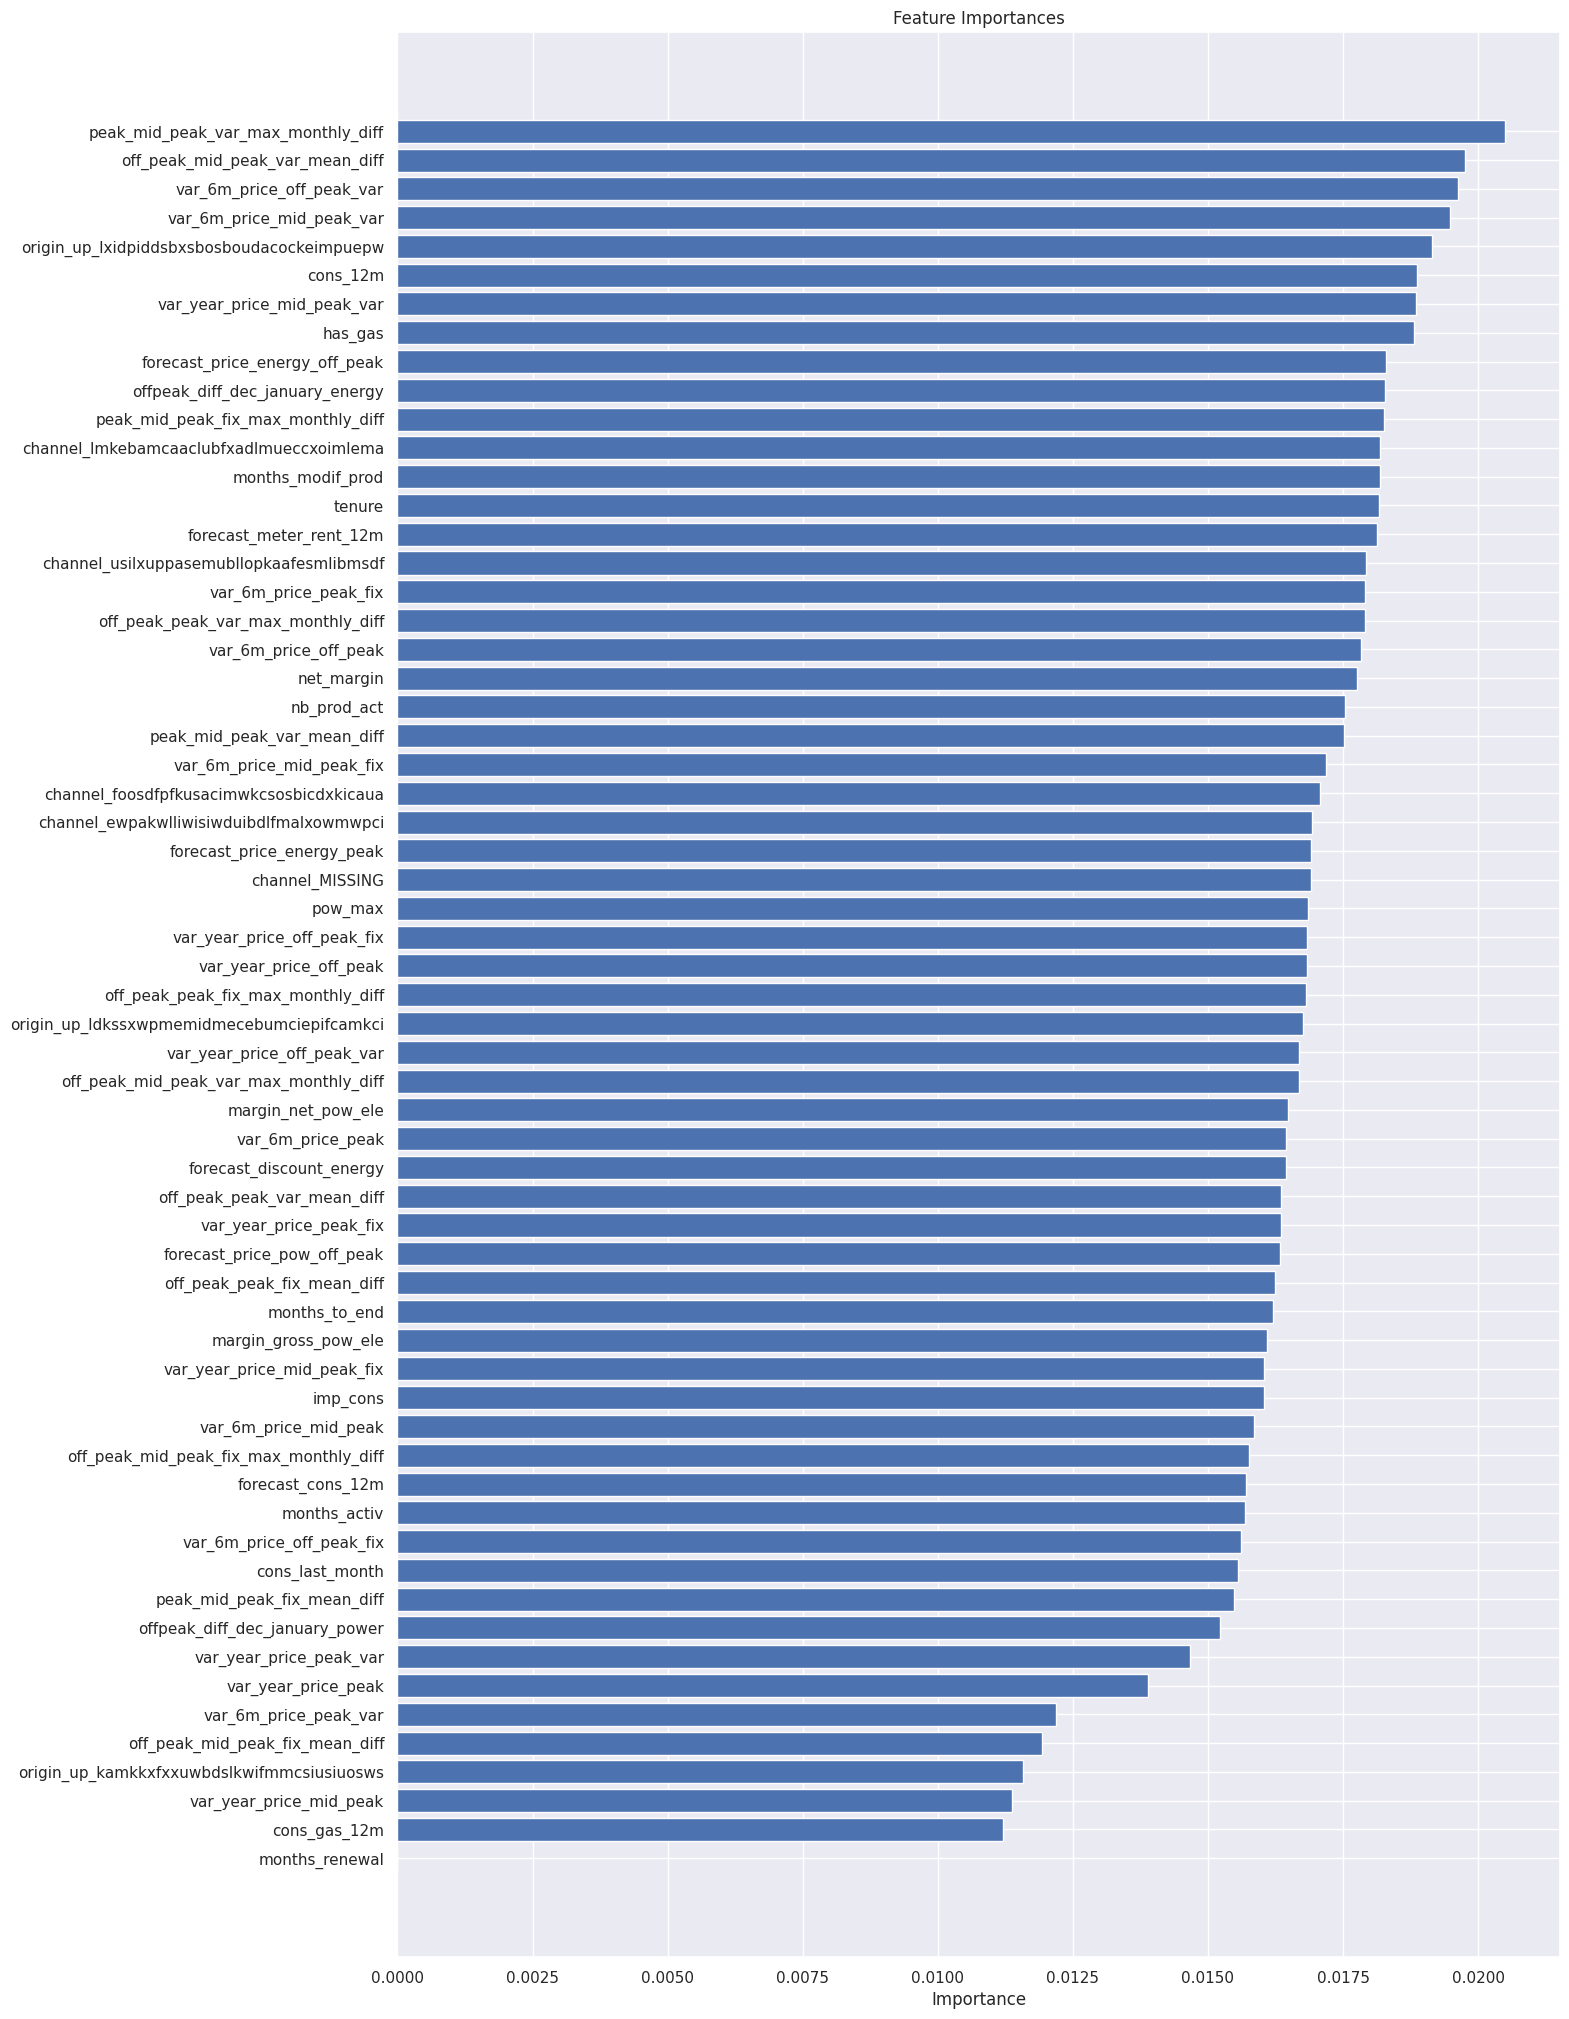

In [14]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

In [15]:
proba_predictions = model.predict_proba(X_test)
probabilities = proba_predictions[:, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [16]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

In [17]:
X_test['churn'] = predictions.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('out_of_sample_data_with_predictions.csv')